# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)
len(cities)

['milkovo', 'avarua', 'san patricio', 'hermanus', 'busselton', 'ushuaia', 'taolanaro', 'pakozd', 'vilyuysk', 'albany', 'aklavik', 'dunedin', 'brae', 'saskylakh', 'bambous virieux', 'phan rang', 'abeche', 'acari', 'rikitea', 'roviai', 'hobart', 'sao gabriel da cachoeira', 'mendi', 'moose factory', 'cape town', 'khatanga', 'panjwin', 'meulaboh', 'vila franca do campo', 'liniere', 'dikson', 'barrow', 'jamestown', 'port keats', 'pisco', 'enumclaw', 'magadi', 'hilo', 'sakakah', 'saint-philippe', 'arraial do cabo', 'puerto ayora', 'khash', 'punta arenas', 'thompson', 'port elizabeth', 'cidreira', 'bluff', 'belmonte', 'bilma', 'chokurdakh', 'atuona', 'mar del plata', 'tasiilaq', 'laramie', 'kapaa', 'hithadhoo', 'dondo', 'sinnamary', 'flinders', 'nishihara', 'butaritari', 'sao borja', 'quime', 'iqaluit', 'kloulklubed', 'fortuna', 'vaini', 'mahajanga', 'cortez', 'grand gaube', 'cherskiy', 'klaksvik', 'sorvag', 'kaitangata', 'codrington', 'marakkanam', 'kamoke', 'mataura', 'narsaq', 'talnakh', '

615

In [ ]:
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:

#api calls

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = weather_api_key


query_url = f"{url}appid={key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
# Added a try loop to catch cities that don't return results, had it append a null value instead of an error
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        id = response['id']
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print (f"{city} ID: {id} has been pulled from Open Weather Map")
    except (KeyError, IndexError):
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        print(f"{city} not found, going to keep going!")

eather Map
mackay ID: 2159220 has been pulled from Open Weather Map
tiksi ID: 2015306 has been pulled from Open Weather Map
buchanan ID: 2278158 has been pulled from Open Weather Map
port shepstone ID: 964406 has been pulled from Open Weather Map
aden ID: 415189 has been pulled from Open Weather Map
coari ID: 3664539 has been pulled from Open Weather Map
mirina not found, going to keep going!
hofn ID: 2630299 has been pulled from Open Weather Map
khilok ID: 2022463 has been pulled from Open Weather Map
besancon ID: 3033123 has been pulled from Open Weather Map
lhokseumawe ID: 1214658 has been pulled from Open Weather Map
nybro ID: 2687902 has been pulled from Open Weather Map
tupik ID: 2014836 has been pulled from Open Weather Map
yellowknife ID: 6185377 has been pulled from Open Weather Map
banjar ID: 1650232 has been pulled from Open Weather Map
olinda ID: 3393536 has been pulled from Open Weather Map
zwedru ID: 2272491 has been pulled from Open Weather Map
roald ID: 3141667 has been

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#pull data from api key into a csv

weather_dict = {"City":cities,
               "Latitude":lat,
               "Longitude":lng,
               "Max Temp":max_temp,
               "Humidity":humidity,
               "Cloudiness":cloudiness,
               "Wind Speed":wind_speed}

# Data Frame
weather_df = pd.DataFrame(weather_dict)

# Drop NA rows
weather_df = weather_df.dropna()
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,milkovo,54.72,158.62,50.67,54.0,27.0,2.37
1,avarua,-21.21,-159.78,78.80,94.0,75.0,3.36
2,san patricio,19.22,-104.70,80.28,88.0,68.0,3.31
3,hermanus,-34.42,19.23,48.99,95.0,0.0,5.03
4,busselton,-33.65,115.33,66.99,57.0,35.0,5.01


In [25]:
weather_df[weather_df.Humidity > 100].sort_values(['Humidity'], ascending=False)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no city over 100%

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# no humidity outliers - skiping this step 

In [26]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv('city_data.csv', index=False) 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

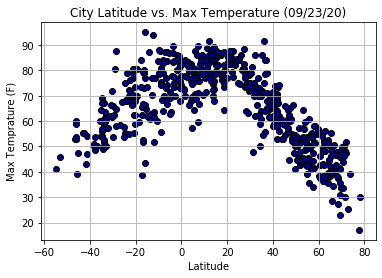

In [29]:

# Create a scatter plot for latitude and temprature relationship 
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("temperature.png")
plt.show()

## Latitude vs. Humidity Plot

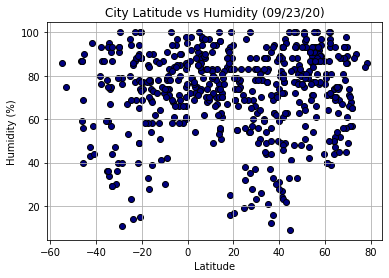

In [30]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

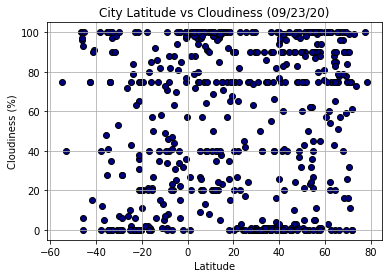

In [31]:

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

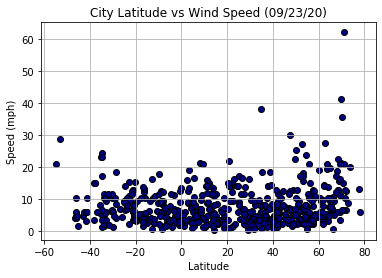

In [33]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("wind_speed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression